# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [209]:
import numpy as np
import pandas as pd
import os

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [210]:
HOUSING_CSV_DATA_PATH = "housing.csv"
housing_df = pd.read_csv(HOUSING_CSV_DATA_PATH)
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [211]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [212]:
print(f"Approx size of dataset in memory (MB): {housing_df.memory_usage().sum() / 1024**2:.2f}")
print(f"Approx size of dataset on disk (MB): {os.path.getsize(HOUSING_CSV_DATA_PATH) / 1024**2:.2f}")

Approx size of dataset in memory (MB): 1.57
Approx size of dataset on disk (MB): 1.36


In [213]:
print(f"Number of entries: {len(housing_df)}")

Number of entries: 20640


In [214]:
print(f"Number of features: {len(housing_df.columns)}")
print(f"Number of explanatory features (excluding final prediction): {len(housing_df.columns) - 1}")

Number of features: 10
Number of explanatory features (excluding final prediction): 9


In [215]:
categorical_features_cols = housing_df.select_dtypes(include=['object']).columns
print(f"Contains categorical data: {'Yes' if len(categorical_features_cols) > 0 else 'No'}")
print(f"All categorical features ({len(categorical_features_cols)}): {categorical_features_cols}")

Contains categorical data: Yes
All categorical features (1): Index(['ocean_proximity'], dtype='object')


In [216]:
categorical_features_unique_vals = housing_df[categorical_features_cols].nunique(dropna=True)
print(f"Number of unique values for each categorical feature:\n{categorical_features_unique_vals}")

Number of unique values for each categorical feature:
ocean_proximity    5
dtype: int64


In [217]:
counts_null_per_feature = housing_df.isnull().sum()
null_feature_counts = counts_null_per_feature[counts_null_per_feature > 0]

print(f"Features with missing values ({len(null_feature_counts)}):")
print(null_feature_counts)

Features with missing values (1):
total_bedrooms    207
dtype: int64


In [218]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


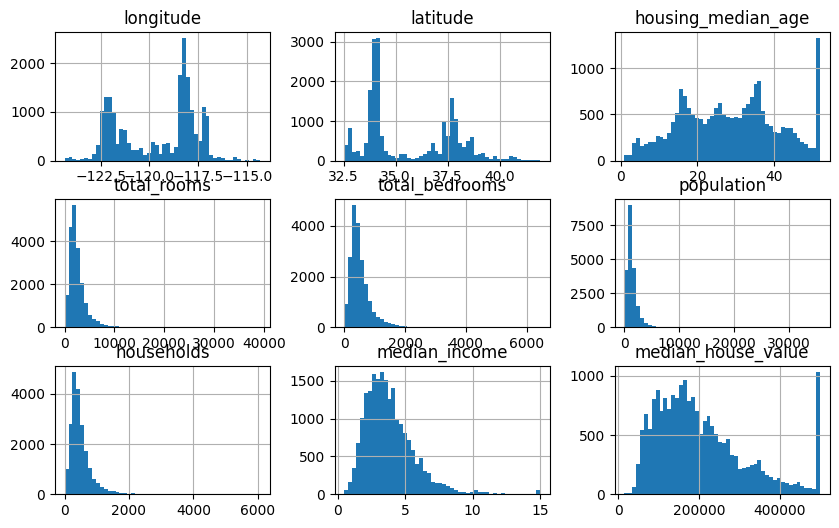

In [219]:
housing_df.hist(bins=50, figsize=(10,6))
plt.show()

In [220]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing_df,
    test_size=0.2,
    random_state=RANDOM_SEED
)

print(f"Train set shape: {train_set.shape}")
print(f"Test set shape: {test_set.shape}")

Train set shape: (16512, 10)
Test set shape: (4128, 10)


In [221]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # drop="first" to avoid multicollinearity
    ("one_hot_encoder", OneHotEncoder(drop="first", handle_unknown="ignore")),
])

combined_pipeline = ColumnTransformer([
    ("num", num_pipeline, housing_df.select_dtypes(exclude=["object"]).columns),
    ("cat", cat_pipeline, housing_df.select_dtypes(include=["object"]).columns),
])

fit_combined_pipeline = combined_pipeline.fit(train_set)


In [222]:
train_set_prepared = fit_combined_pipeline.transform(train_set)
test_set_prepared = fit_combined_pipeline.transform(test_set)

del train_set, test_set

print(train_set_prepared[0])

[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
  0.32290591 -0.326196   -0.90118909  0.          0.          0.
  1.        ]


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [223]:
from enum import Enum
import numpy as np

class DistanceMetric(Enum):
    MANHATTAN = 'manhattan'
    EUCLIDEAN = 'euclidean'
    SUP = 'sup'

class Custom_KMeans:
    def __init__(
        self, 
        dataset: np.ndarray,
        k: int, 
        distance_metric: DistanceMetric, 
        max_iterations: int = 1000
    ) -> None:
        self.dataset = dataset
        self.k = k
        self.distance_metric = distance_metric
        self.max_iterations = max_iterations
        self.centroids: np.ndarray = None
        self.labels: np.ndarray = None

    def fit(self) -> None:
        self._initialize_centroids()
        for iteration in range(self.max_iterations):
            prev_labels = self.labels.copy() if self.labels is not None else None
            self._assign_labels()
            self._recompute_centroids()

            # Check for convergence
            if prev_labels is not None and np.array_equal(self.labels, prev_labels):
                print(f"Converged after {iteration + 1} iterations.")
                break

    def _initialize_centroids(self) -> None:
        self.centroids = self.dataset[
            np.random.choice(self.dataset.shape[0], self.k, replace=False)
        ]

    def _assign_labels(self) -> None:
        self.labels = np.array([
            np.argmin([self._minkowski_distance(x, centroid) for centroid in self.centroids])
            for x in self.dataset
        ])

    def _recompute_centroids(self) -> None:
        new_centroids = []
        for i in range(self.k):
            points_in_cluster = self.dataset[self.labels == i]
            if points_in_cluster.size == 0:
                new_centroid = self.dataset[np.random.choice(self.dataset.shape[0])]
                print(f"Cluster {i} is empty. Reinitializing centroid to a random point.")
            else:
                new_centroid = points_in_cluster.mean(axis=0)
            new_centroids.append(new_centroid)
        self.centroids = np.array(new_centroids)

    def _minkowski_distance(self, a: np.ndarray, b: np.ndarray) -> float:
        if self.distance_metric == DistanceMetric.SUP:
            return np.max(np.abs(a - b))
        elif self.distance_metric == DistanceMetric.MANHATTAN:
            return np.sum(np.abs(a - b))
        elif self.distance_metric == DistanceMetric.EUCLIDEAN:
            return np.sqrt(np.sum((a - b) ** 2))
        else:
            raise ValueError("Unsupported distance metric.")


custom_kmeans = Custom_KMeans(
    dataset=train_set_prepared,
    k=3,
    distance_metric=DistanceMetric.SUP,
    max_iterations=1000
)
custom_kmeans.fit()

print(custom_kmeans.centroids)
print(custom_kmeans.labels[:100])

Converged after 19 iterations.
[[ 7.76642809e-01 -7.62801569e-01  4.88068342e-01 -4.11106423e-01
  -3.24989759e-01 -2.15043453e-01 -3.19867799e-01 -4.76177286e-01
  -4.10838393e-01  2.52244898e-01  6.12244898e-04  2.44897959e-03
   1.51020408e-01]
 [-1.03913451e+00  1.12745092e+00  1.51453766e-01 -2.57816335e-01
  -2.65785916e-01 -3.02116930e-01 -2.73729052e-01 -3.33272321e-01
  -4.17815839e-01  5.12115385e-01  0.00000000e+00  2.49230769e-01
   8.30769231e-02]
 [ 2.49212366e-01 -3.31412526e-01 -4.95803877e-01  5.23248038e-01
   4.63901525e-01  4.09345128e-01  4.66429084e-01  6.34167931e-01
   6.52799515e-01  2.07111666e-01  1.55957580e-04  8.51528384e-02
   1.42545228e-01]]
[0 0 2 0 1 2 0 2 2 2 1 0 1 2 0 0 1 1 0 0 0 2 1 0 1 1 1 0 0 1 0 2 0 0 2 0 1
 0 2 0 2 0 0 2 0 2 1 0 0 0 0 1 1 0 0 2 2 0 0 0 0 0 1 0 2 2 2 0 0 2 1 0 0 2
 1 1 0 0 0 2 2 1 0 1 1 0 0 0 2 1 2 1 2 2 2 2 0 0 1 2]


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

* **Plot the SSE over different number of cluster:** As referenced in the "elbow plot " in the lecture, you will reproduce the plot with different number of k, then determine which k produces a result that works best.



In [224]:
# Your code goes here


# Your paragraph goes here for this section

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.



- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!